In [59]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

In [60]:
batch_size = 32
train_data = 'data/train/'
test_data = 'data/test/'
image_w = 150
image_h = 150

In [61]:
vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=(image_w,image_h,3))

In [62]:
# 搭建全连接层
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(10,activation='softmax'))

model = Sequential()
model.add(vgg16_model)
model.add(top_model)

In [63]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
) 
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
) 

In [64]:


# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(image_w,image_h),
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(image_w,image_h),
    batch_size=batch_size,
    )

Found 2333 images belonging to 10 classes.
Found 586 images belonging to 10 classes.


In [65]:
label = train_generator.class_indices
label

{'n02086240-ShihTzu': 0,
 'n02088364-beagle': 1,
 'n02093056-bullterrier': 2,
 'n02094433-Yorkshireterrier': 3,
 'n02097047-schnauzer': 4,
 'n02098286-WestHighlandwhiteterrier': 5,
 'n02099712-Labradorretriever': 6,
 'n02102318-cockerspaniel': 7,
 'n02105641-OldEnglishsheepdog': 8,
 'n02105855-Shetlandsheepdog': 9}

In [68]:
label = dict(zip(label.values(), label.keys()))
file = open('label.json','w',encoding='utf-8')
json.dump(label,file)
label

{0: 'n02086240-ShihTzu',
 1: 'n02088364-beagle',
 2: 'n02093056-bullterrier',
 3: 'n02094433-Yorkshireterrier',
 4: 'n02097047-schnauzer',
 5: 'n02098286-WestHighlandwhiteterrier',
 6: 'n02099712-Labradorretriever',
 7: 'n02102318-cockerspaniel',
 8: 'n02105641-OldEnglishsheepdog',
 9: 'n02105855-Shetlandsheepdog'}

In [8]:
# 定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=SGD(lr=1e-3,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=50,validation_data=test_generator,validation_steps=len(test_generator))

Epoch 1/50
73/73 [==============================] - 76s 1s/step - loss: 2.3262 - acc: 0.1419 - val_loss: 2.2158 - val_acc: 0.2129
Epoch 2/50
73/73 [==============================] - 60s 817ms/step - loss: 2.1684 - acc: 0.2010 - val_loss: 1.9530 - val_acc: 0.3288
Epoch 3/50
73/73 [==============================] - 60s 817ms/step - loss: 1.9755 - acc: 0.2781 - val_loss: 1.6139 - val_acc: 0.4736
Epoch 4/50
73/73 [==============================] - 60s 816ms/step - loss: 1.7746 - acc: 0.3770 - val_loss: 1.4787 - val_acc: 0.4753
Epoch 5/50
73/73 [==============================] - 60s 817ms/step - loss: 1.5629 - acc: 0.4549 - val_loss: 1.1229 - val_acc: 0.6065
Epoch 6/50
73/73 [==============================] - 60s 817ms/step - loss: 1.3597 - acc: 0.5321 - val_loss: 1.1916 - val_acc: 0.5945
Epoch 7/50
73/73 [==============================] - 60s 817ms/step - loss: 1.2502 - acc: 0.5765 - val_loss: 0.9447 - val_acc: 0.6899
Epoch 8/50
73/73 [==============================] - 60s 816ms/step - los

In [9]:
# pip install h5py
model.save('model_vgg16_dog.h5')

# 测试

In [47]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array,load_img
import json
import numpy as np
import matplotlib.pyplot as plt

In [69]:
file = open('label.json','r',encoding='utf-8')
label = json.load(file)

# 载入模型
model = load_model('model_vgg16_dog.h5')

In [76]:
def predict(image):
    # 导入图片
    image = load_img(image)
    plt.imshow(image)
    image = image.resize((150,150))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image,0)   
    plt.title(label[str(model.predict_classes(image)[0])])
    plt.axis('off')
    plt.show()

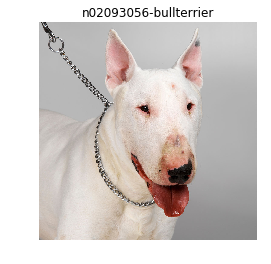

In [77]:
predict('data/test/n02093056-bullterrier/Niutougeng-is09aa7re.jpg')

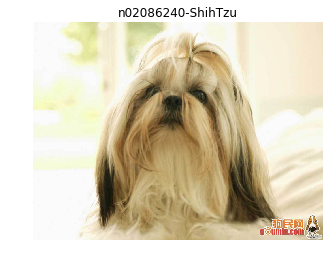

In [78]:
predict('data/test/n02086240-ShihTzu/Chrysanthemum-558o2.jpg')

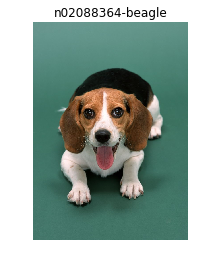

In [79]:
predict('data/test/n02088364-beagle/Beagle18439.jpg')